In [0]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, verbose=1)
test_loss = model.evaluate(test_images, test_labels)

2.2.0-rc2
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4447 - accuracy: 0.8383
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.8912
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2493 - accuracy: 0.9070
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2166 - accuracy: 0.9200
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1899 - accuracy: 0.9288
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1695 - accuracy: 0.9373
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1496 - accuracy: 0.9441
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1336 - accuracy: 0.9503
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1162 - accuracy: 0.9559
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - los

#Visualizing the Convolutions and Pooling

In [0]:
# Print Labels
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


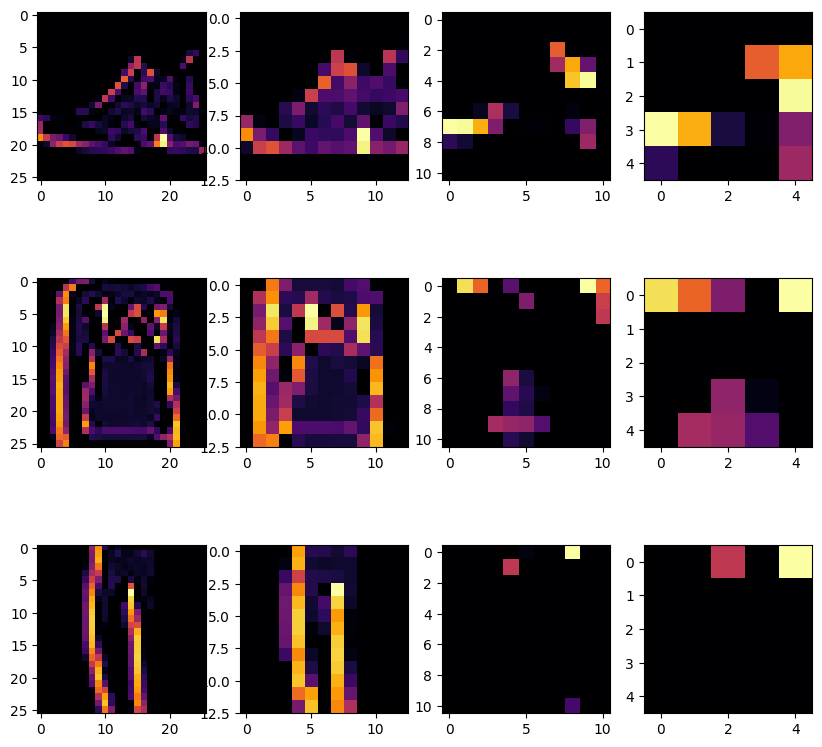

In [0]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4, figsize=(10,10), dpi=100)

FIRST_IMAGE=0
SECOND_IMAGE=1
THIRD_IMAGE=2
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

